In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from math import floor, ceil, sqrt
import pywt

In [8]:
def imshow(*args, figsize=10, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1], cmap='gray')
        plt.axis('off')
    plt.show()

In [4]:
def gaussian_pyramid(img, num_levels):
  lower = img.copy()
  gaussian_pyr = [lower]
  for i in range(num_levels):

    lower = cv2.pyrDown(lower)
    gaussian_pyr.append(np.float32(lower))
  return gaussian_pyr

In [5]:
def laplacian_pyramid(gaussian_pyr):
    laplacian_top = gaussian_pyr[-1]
    num_levels = len(gaussian_pyr) - 1
    
    laplacian_pyr = [laplacian_top]
    for i in range(num_levels,0,-1):
        size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
        gaussian_expanded = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
        laplacian = np.subtract(gaussian_pyr[i-1], gaussian_expanded)
        laplacian_pyr.append(laplacian)
    return laplacian_pyr

# 5.1.1
For the
“Mona
Lisa”
image, build a 5 level Gaussian pyramid and display it in a format. Also, implement and

display a Laplacian (difference of Gaussian (DoG)) pyramid.

In [31]:
monalisa = cv2.imread('/content/sample_data/mona lisa.jpg', cv2.IMREAD_GRAYSCALE)

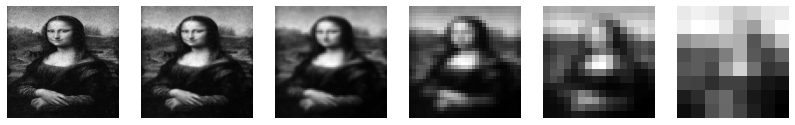

In [32]:
monalisa = cv2.resize(monalisa, (256, 256)) 

g_pyramid = gaussian_pyramid(monalisa, 5)
imshow(g_pyramid, figsize=14)

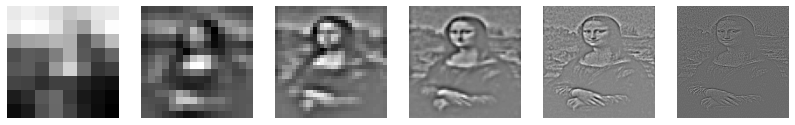

In [33]:
l_pyramid = laplacian_pyramid(g_pyramid)
imshow(l_pyramid, figsize=14)

# 5.1.2

In [26]:
def get_kernel(sigma):
    size = int(4 * sigma + 1)
    kernel = cv2.getGaussianKernel(size, sigma)
    kernel = np.dot(kernel, kernel.T)
    return kernel
    return 

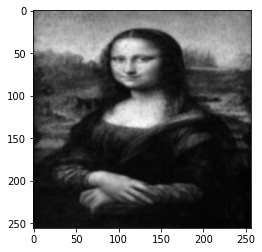

In [34]:
k1 = get_kernel(1)
r1 = cv2.filter2D(monalisa, -1, k1)
plt.imshow(r1,'gray')

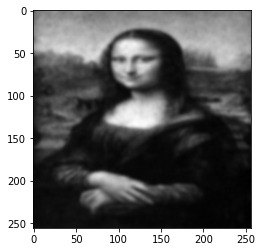

In [35]:
k2 = get_kernel(np.sqrt(2))
r2 = cv2.filter2D(r1, -1, k2)
plt.imshow(r2,'gray')

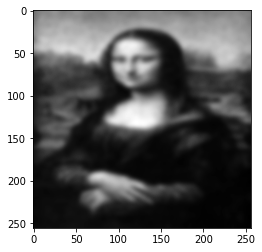

In [36]:
k3 = get_kernel(2)
r3 = cv2.filter2D(r2, -1, k3)
plt.imshow(r3,'gray')

#5.1.3

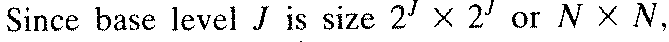

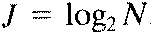

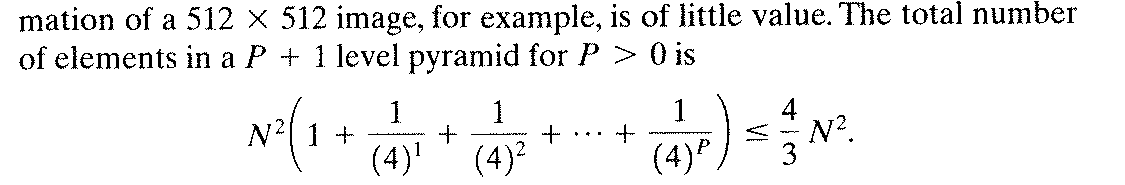

In [ ]:
# approximation pyramid = gaussian pyramid

In [ ]:
# prediction residual pyramid = laplacian pyramid

In [ ]:
#maximum number of levels
J = int(round(math.log(N, 2)))

#no. total pixels in pyramid
(N*N)*(4/3)

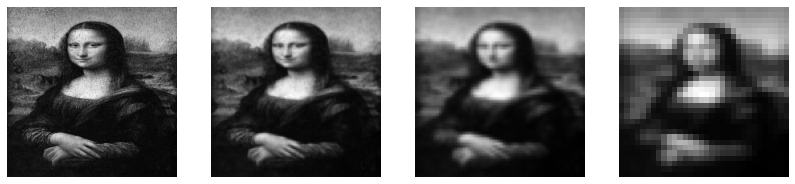

In [38]:
g_pyramid = gaussian_pyramid(monalisa, 3)
imshow(g_pyramid, figsize=14)

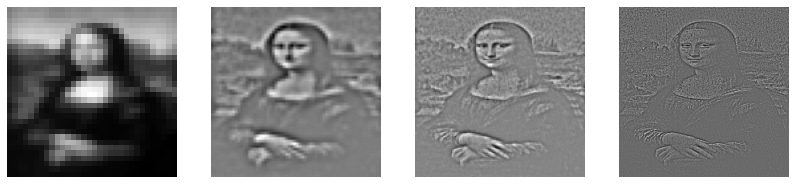

In [39]:
l_pyramid = laplacian_pyramid(g_pyramid)
imshow(l_pyramid, figsize=14)

#5.1.4
For the grayscale Lena image, manually compute a 3-level approximation pyramid and corresponding prediction residual pyramid. Use 2x2 averaging for the approximation and use pixel replication for the interpolation filters.

In [2]:
lena = cv2.imread('/content/sample_data/Lena.bmp', cv2.IMREAD_GRAYSCALE)

In [40]:
def down_sample_avg(im):
    original_width = im.shape[1]
    original_height = im.shape[0]
    width = original_width // 2
    height = original_height // 2
    resized_image = np.zeros(shape=(height, width), dtype=np.uint8)
    scale = 2
    for i in range(height):
        for j in range(width):
            temp = 0
            for x in range(scale):
                for y in range(scale):
                    temp += im[i*scale + x, j*scale + y]
            resized_image[i, j] = temp/(scale*scale)

    return resized_image

In [50]:
def nearest(input):
  sx,sy = input.shape
  output = np.zeros((sx*2, sy*2), input.dtype)
  for y in range(len(output)):
    for x in range(len(output[y])):
      proj_x = x // 2
      proj_y = y // 2
      output[y][x] = input[proj_y][proj_x]

  return output

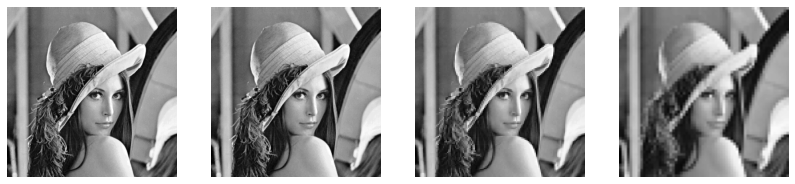

In [43]:
# approximation pyramid 2*2 averaging
G = lena.copy()
gpA = [G]
for i in range(3):
    G = down_sample_avg(G)
    gpA.append(G)

imshow(gpA, figsize=14)

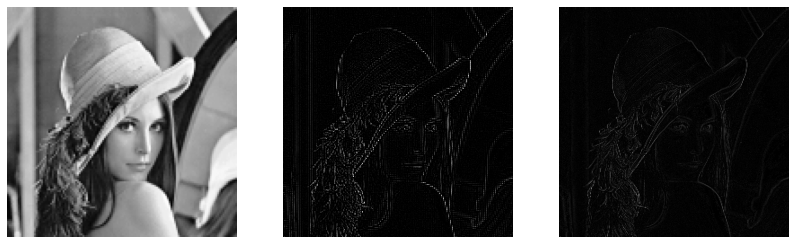

In [53]:
# prediction residual pyramid pixel replication for the interpolation filter
lpA = [gpA[2]]
for i in range(2,0,-1):
    GE = nearest(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

imshow(lpA, figsize=14)

#5.1.5

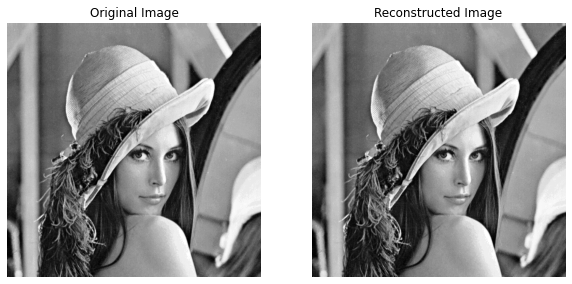

In [12]:
# wavelet transform
cA, (cH, cV, cD) = pywt.dwt2(lena, 'haar', mode='periodization')

# inverse wavelet transform
coefficients = [cA, (cH, cV, cD)]
img_i = pywt.idwt2(coefficients, 'haar', mode='periodization')
img_i = img_i.astype('uint8')

imshow(lena, img_i, figsize=(10), title=['Original Image', 'Reconstructed Image'])

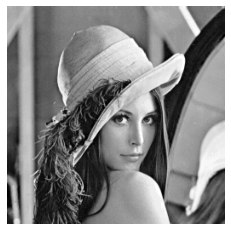

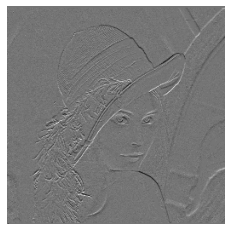

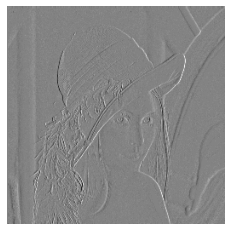

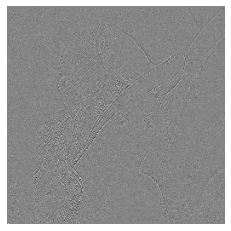

In [58]:
cA, (cH, cV, cD) = pywt.dwt2(lena, 'haar', mode='periodization')

plt.imshow(cA, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(cH, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(cV, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(cD, cmap='gray')
plt.axis('off')
plt.show()

#5.1.6

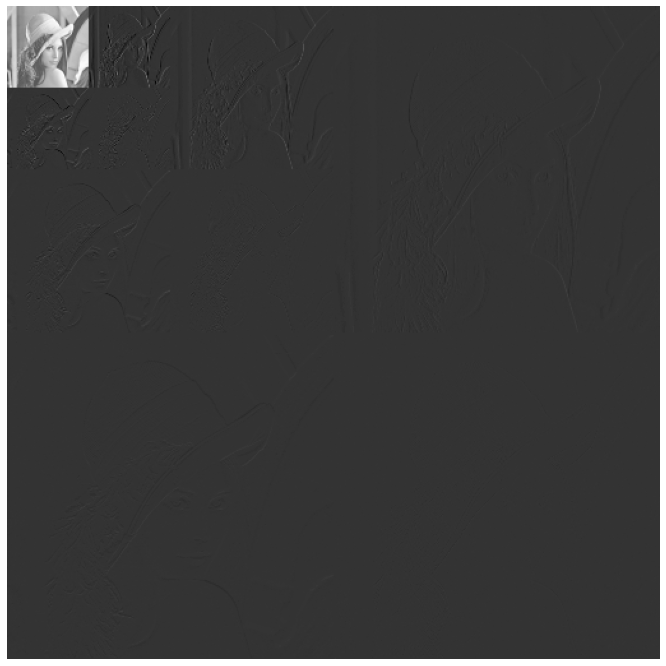

In [121]:
coeffs = pywt.wavedec2(lena, 'haar', mode='periodization', level=3)
q_coeffs = coeffs

c_matrix, c_slices = pywt.coeffs_to_array(coeffs)
plt.figure(figsize=(12, 12))
plt.imshow(c_matrix, cmap='gray')
plt.axis('off')
plt.show()

In [91]:
cH1, cV1, cD1 = coeffs[-1]

In [98]:
for i in range(256):
  for j in range(256):
    cH = cH1[i][j] 
    cH1[i][j] = np.round(abs(cH) / 2) * np.sign(cH) * 2

    cV = cV1[i][j]
    cV1[i][j] = np.round(abs(cV) / 2) * np.sign(cV) * 2

    cD = cD1[i][j]
    cD1[i][j] = np.round(abs(cD) / 2) * np.sign(cD) * 2

(256, 256)

In [92]:
cH2, cV2, cD2 = coeffs[-2]

In [101]:
for i in range(128):
  for j in range(128):
    cH = cH2[i][j] 
    cH2[i][j] = np.round(abs(cH) / 2) * np.sign(cH) * 2

    cV = cV2[i][j]
    cV2[i][j] = np.round(abs(cV) / 2) * np.sign(cV) * 2

    cD = cD2[i][j]
    cD2[i][j] = np.round(abs(cD) / 2) * np.sign(cD) * 2

In [93]:
cH3, cV3, cD3 = coeffs[-3]

In [104]:
cA3 = coeffs[0]

In [106]:
for i in range(64):
  for j in range(64):
    cH = cH3[i][j] 
    cH3[i][j] = np.round(abs(cH) / 2) * np.sign(cH) * 2

    cV = cV3[i][j]
    cV3[i][j] = np.round(abs(cV) / 2) * np.sign(cV) * 2

    cD = cD3[i][j]
    cD3[i][j] = np.round(abs(cD) / 2) * np.sign(cD) * 2

    cA = cA3[i][j]
    cA3[i][j] = np.round(abs(cA) / 2) * np.sign(cA) * 2

In [122]:
q_coeffs[-1] = cH1, cV1, cD1 

q_coeffs[-2] = cH2, cV2, cD2 

q_coeffs[-3] = cH3, cV3, cD3 

q_coeffs[0] = cA3 

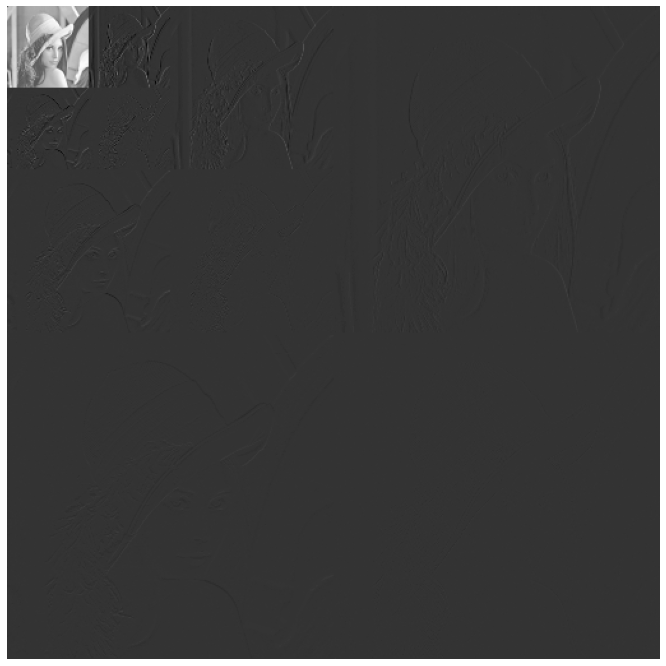

In [129]:
a,_ = pywt.coeffs_to_array(q_coeffs)
plt.figure(figsize=(12, 12))
plt.imshow(a, cmap='gray')
plt.axis('off')
plt.show()

In [124]:
recon = pywt.waverec2(q_coeffs,'haar')

In [117]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / sqrt(mse))
    return psnr

In [118]:
psnr = PSNR(lena, recon)

In [119]:
psnr

42.74083149321203